In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy 
import scipy

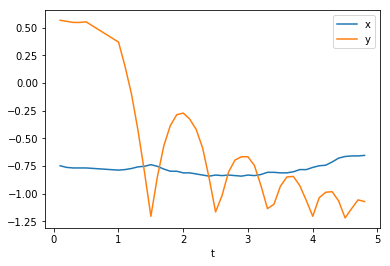

In [19]:
ball = pd.read_csv("bouncing_ball.csv")
#print(ball)
ball.plot('t') #plots my y (vertical position) and x (horizontial position) data against the variable t (time)

In [20]:
line = numpy.polyfit(ball.t, ball.y, 9) #notice that it's t (time) then x (position). 1 refers to linear here. 
# numpy.polyfit? #Uncomment this line if you wish to look a bit closer to the polyfit command
p = numpy.poly1d(line) #Do this to convert it into a usable form for plotting

          9          8         7        6         5         4         3
-0.01416 x + 0.3276 x - 3.186 x + 16.9 x - 53.01 x + 99.31 x - 106.7 x
          2
 + 58.97 x - 14.03 x + 1.561


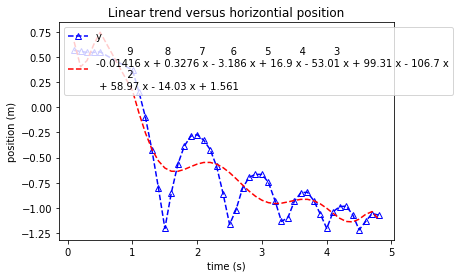

In [21]:
fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(ball.t,ball.y, c='b',marker="^",ls='--',label='y',fillstyle='none') #Data is horizontial axis, then vertical axis
#ax.plot(ball.t,ball.y,c='g',marker=(8,2,0),ls='--',label='y') #Saving time versus vertical position for later
ax.plot(ball.t, p(ball.t), c = 'r', ls = '--', label= p) #plotting the linear formula

#plt.text(2, 0.65, 'y = {} x + {}'.format(m, b)

plt.legend(loc=2) #Legends are very useful
plt.draw()
plt.title("Linear trend versus horizontial position")
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
print(p) #So you can see the form of the polynomial that was fitted. In this case it is y = mx + b
#plt.text? #another way to add annotations to a plot

Really though I want to look at the bounces independantly from each other. So I'd rather break it up from the bottom of the first bounce to the beginning of the second bounce. To do that I need to break up the data and then analyze it. I could add the polyfit and up the number of degree's it would look at, but that's quite a bit harder and does not really capture the movement. As you can see above the red line aka the poly fit, does not hit the bottom position. 

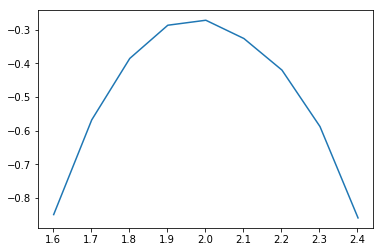

In [22]:
tt = range(11, 20) #Here I redefine my time period I want to look at
y_bounce1 = ball.loc[tt,'y' ]
t_bounce1 = ball.loc[tt,'t']
plt.plot(t_bounce1, y_bounce1)


In [23]:
fit_bounce1 = numpy.polyfit(t_bounce1, y_bounce1, 2) 
#notice that it's t (time) then x (position). 1 refers to linear here. 
p = numpy.poly1d(fit_bounce1) 
#Do this to convert it into a usable form for plotting

        2
-3.636 x + 14.52 x - 14.76


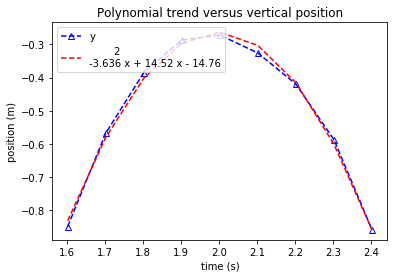

In [24]:
fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(t_bounce1, y_bounce1, c='b',marker="^",ls='--',label='y',fillstyle='none') #Data is horizontial axis, then vertical axis
ax.plot(t_bounce1, p(t_bounce1), c = 'r', ls = '--', label= p) #plotting the linear formula

plt.legend(loc=2) #Legends are very useful
plt.draw()
plt.title("Polynomial trend versus vertical position")
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
print(p) #So you can see the form of the polynomial that was fitted. In this case it is y = mx + b
#plt.text? #another way to add annotations to a plot


Okay now I am calculating the velocity and acceleration of my falling ball. 

In [25]:
vel_y = numpy.diff(y_bounce1)  #Velocity calculation
acc = numpy.diff(vel_y)
t_diff = t_bounce1[:8] #To make the time and velocity vector's the same length. 


fit_bounce1_velocity = numpy.polyfit(t_diff, vel_y, 1) #notice that it's t (time) then x (position). 1 refers to linear here. 
p_vel = numpy.poly1d(fit_bounce1_velocity) #Do this to convert it into a usable form for plotting

In [26]:
#Now I'm going to plot my fit and my velocity 

 
-0.7454 x + 1.454


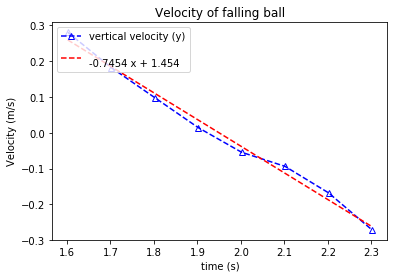

In [27]:
#plt.plot(vel_y,t_bounce1[:8])

fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(t_diff, vel_y, c='b',marker="^",ls='--',label='vertical velocity (y)',fillstyle='none') #Data is horizontial axis, then vertical axis
ax.plot(t_diff, p_vel(t_diff), c = 'r', ls = '--', label= p_vel) #plotting the linear formula
#plt.text(2, 0.65, 'y = {} x + {}'.format(m, b)

plt.legend(loc=2) #Legends are very useful
plt.draw()
plt.title("Velocity of falling ball")
ax.set_xlabel('time (s)')
ax.set_ylabel('Velocity (m/s)')
print(p_vel) #So you can see the form of the polynomial that was fitted. In this case it should be y = mx + b
#plt.text? #another way to add annotations to a plot



Now I want to calculate my uncertainties between my 'theory' and actual fit. For this section we would like you to calculate the how close the theory matches the data. If I estimate my error on the position (y) to be around .1 m, and my error on my time to be around .1 s (t), then I will use the rule of propogating errors through a quotent (y/t = v). (http://web.mit.edu/fluids-modules/www/exper_techniques/2.Propagation_of_Uncertaint.pdf)

In [28]:
dt = 0.1; dy =1
dv = (dt/ t_bounce1[:8] + dy/ y_bounce1[:8]) * vel_y
print(dv)

11   -0.313471
12   -0.310469
13   -0.250291
14   -0.050771
15    0.196576
16    0.282564
17    0.391461
18    0.449640
dtype: float64


# Basketball Shot
Now I will analyze the basketball shot's velocity and acceleration. Turns out you can download the v(t) and a(t) from Tracker as well! You just have to press the "Table" button on the chart.

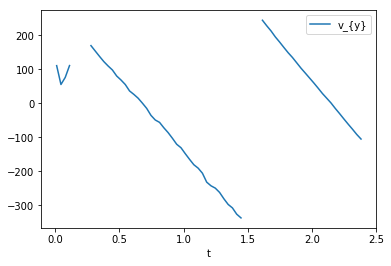

In [29]:
bball = pd.read_csv("BasketballShot.csv")
bball.plot('t','v_{y}')

Text(18.75,0.5,'position (m)')

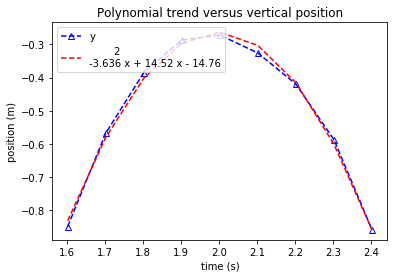

In [30]:
fig=plt.figure() #initiate the figure
ax=fig.add_subplot(111) #So we can add multiple lines

ax.plot(t_bounce1, y_bounce1, c='b',marker="^",ls='--',label='y',fillstyle='none') #Data is horizontial axis, then vertical axis
ax.plot(t_bounce1, p(t_bounce1), c = 'r', ls = '--', label= p) #plotting the linear formula

plt.legend(loc=2) #Legends are very useful
plt.draw()
plt.title("Polynomial trend versus vertical position")
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')